## 데이터 스케일링

### standard, min-max, robust 비교 고찰

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

In [33]:
scaler=StandardScaler()
standard_df=scaler.fit_transform(x)
pd.DataFrame(standard_df, columns=['x1','x2'])

,x1,x2
0,0.166839,0.109171
1,0.294525,-0.271923
2,-1.318157,0.100627
3,-0.085549,-0.654120
4,-0.275432,-0.961440
...,...,...
1020,-6.381439,6.060371
1021,-4.022071,5.515897
1022,-6.839624,5.667996
1023,-4.125391,6.201965


In [17]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1','x2'])

In [18]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1','x2'])

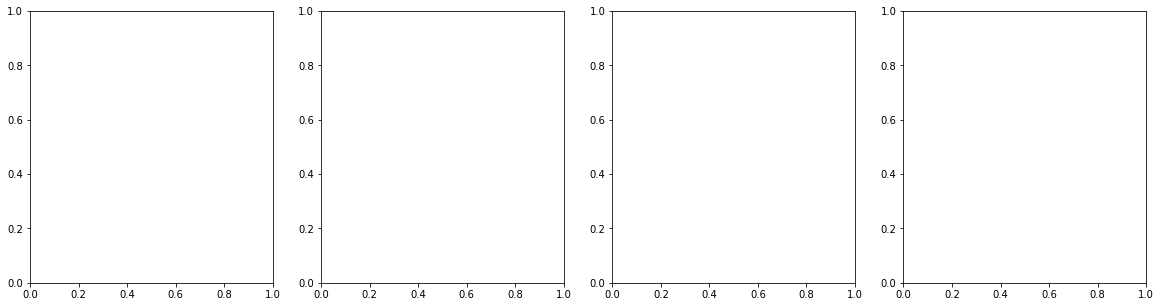

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

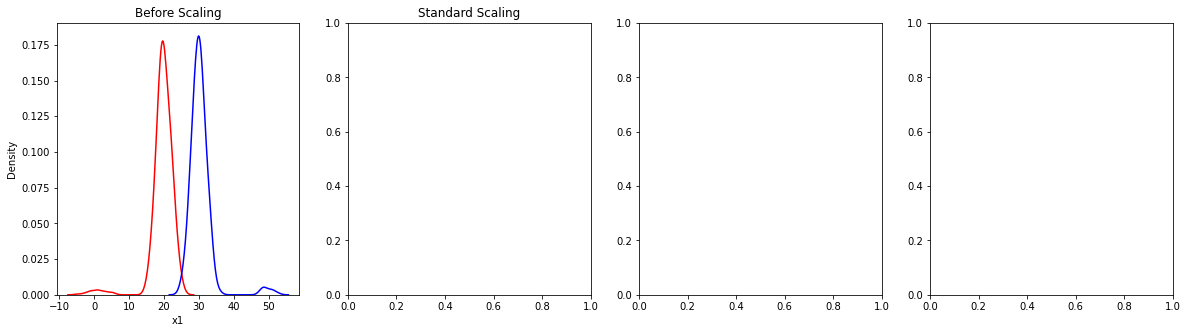

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=ax1, color='red')
sns.kdeplot(x['x2'], ax=ax1, color='blue')

ax2.set_title("Standard Scaling")
sns.kdeplot(standard_df['x1'], ax=ax2, color='r')
sns.kdeplot(standard_df['x2'], ax=ax2, color='b')

ax3.set_title("MinMax Scaling")
sns.kdeplot(minmax_df['x1'], ax=ax3, color='r')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='b')

ax4.set_title("Robust Scaling")
sns.kdeplot(robust_df['x1'], ax=ax4, color='r')
sns.kdeplot(robust_df['x2'], ax=ax4, color='b')

plt.show()

### sklearn.preprocessing.StandardScaler
* StandardScaler(*, copy=True, with_mean=True, with_std=True)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

In [58]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_data = iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### sklearn.preprocessing.MinMaxScaler
* MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler

### sklearn.preprocessing.RobustScaler
* RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust#sklearn.preprocessing.RobustScaler

In [74]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


NameError: name 'iris_df_scales' is not defined

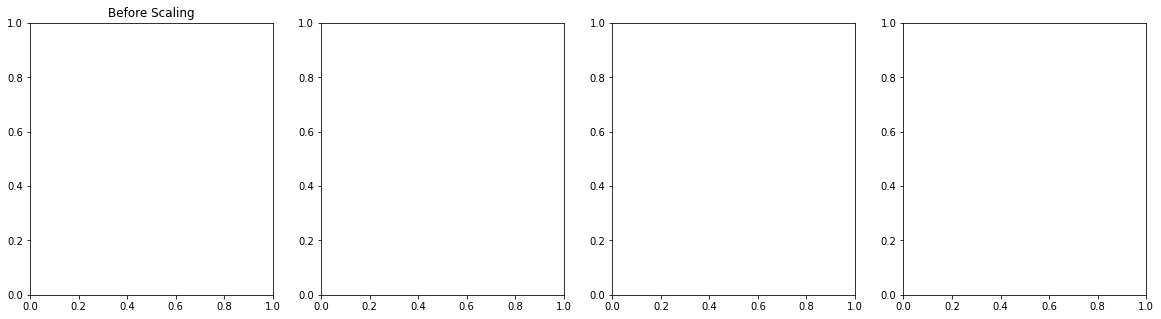

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))

ax1.set_title('Before Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax1, color = 'b')

ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax2, color = 'b')

ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_scales['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_scales['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_scales['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_scales['petal width (cm)'], ax = ax3, color = 'b')

ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax4, color = 'b')

plt.show()